In [2]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
from MDAnalysis.analysis import hole2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

In [2]:
#u = mda.Universe("files/07_equil_74_ions_sodium.psf", "P400mv_05_74_ions/05_p400mv_74_ions.dcd", in_memory=True, in_memory_step=100)
#protein = u.select_atoms("protein")
#with mda.Writer("new.dcd", n_atoms=u.atoms.n_atoms) as W:
#    for ts in u.trajectory[0:-1:100]: 
#     W.write(u.atoms)
#print(ts.frame)

In [3]:
u = mda.Universe("files/07_equil_74_ions_sodium.psf", ["NPT_run/01_74_ions_NPT_run.dcd", "NPT_run/01_74_ions_NPT_run.restart.dcd", "NPT_run/02_74_ions_NPT_run.dcd", "NPT_run/03_74_ions_NPT_run.dcd"], in_memory=True, in_memory_step=100)

In [4]:
u.trajectory

<MemoryReader with 223 frames of 58580 atoms>

#u = mda.Universe("files/07_equil_74_ions_sodium.psf", "new.dcd") 

In [56]:
#u2.trajectory

<DCDReader new.dcd with 300 frames of 58580 atoms>

In [4]:
#u2 = mda.Universe("files/07_equil_74_ions_sodium.psf", "new.dcd") 
ha = hole2.HoleAnalysis(u, select='protein', cpoint= [-1.6432, 21.024, -1.827], cvect= [1,0,0], executable='/Users/sukanyakonar/Downloads/hole2-master/exe/hole', sample=0.2, end_radius=22.0, vdwradii_file=None)
ha.run(random_seed=31415)

/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/analysis/hole2/hole.py:725: DeprecationWarning: The `sphpdbs` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.sphpdbs` instead.
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/analysis/hole2/hole.py:733: DeprecationWarning: The `outfiles` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.outfiles` instead.
  warnings.warn(wmsg, DeprecationWarning)
/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1078: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/local/Cellar/jupyterlab/3.2.4/libexec/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:1078: UserWarning: Found no informa

In [5]:
ha

In [6]:
gathered = ha.gather()
print(gathered.keys())

dict_keys(['rxn_coord', 'radius', 'cen_line_D'])


In [7]:
print(len(gathered['rxn_coord']))

150


In [8]:
gathered['rxn_coord']

[array([-3.40432e+01, -3.39432e+01, -3.38432e+01, -3.37432e+01,
        -3.36432e+01, -3.35432e+01, -3.34432e+01, -3.33432e+01,
        -3.32432e+01, -3.31432e+01, -3.30432e+01, -3.29432e+01,
        -3.28432e+01, -3.27432e+01, -3.26432e+01, -3.25432e+01,
        -3.24432e+01, -3.23432e+01, -3.22432e+01, -3.21432e+01,
        -3.20432e+01, -3.19432e+01, -3.18432e+01, -3.17432e+01,
        -3.16432e+01, -3.15432e+01, -3.14432e+01, -3.13432e+01,
        -3.12432e+01, -3.11432e+01, -3.10432e+01, -3.09432e+01,
        -3.08432e+01, -3.07432e+01, -3.06432e+01, -3.05432e+01,
        -3.04432e+01, -3.03432e+01, -3.02432e+01, -3.01432e+01,
        -3.00432e+01, -2.99432e+01, -2.98432e+01, -2.97432e+01,
        -2.96432e+01, -2.95432e+01, -2.94432e+01, -2.93432e+01,
        -2.92432e+01, -2.91432e+01, -2.90432e+01, -2.89432e+01,
        -2.88432e+01, -2.87432e+01, -2.86432e+01, -2.85432e+01,
        -2.84432e+01, -2.83432e+01, -2.82432e+01, -2.81432e+01,
        -2.80432e+01, -2.79432e+01, -2.7

In [9]:
flat = ha.gather(flat=True)
print(len(flat['rxn_coord']))

139988


In [10]:
radii, edges = ha.bin_radii(bins=100, range=None)
means, edges = ha.histogram_radii(bins=100, range=None, aggregator=np.mean)

Text(0.5, 0, 'Pore coordinate $\\zeta$ ($\\AA$)')

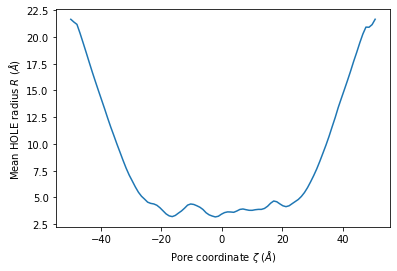

In [11]:
midpoints = 0.5*(edges[1:]+edges[:-1])
plt.plot(midpoints, means)
plt.ylabel(r"Mean HOLE radius $R$ ($\AA$)")
plt.xlabel(r"Pore coordinate $\zeta$ ($\AA$)")

In [12]:
midpoints

array([-49.9352, -48.9192, -47.9032, -46.8872, -45.8712, -44.8552,
       -43.8392, -42.8232, -41.8072, -40.7912, -39.7752, -38.7592,
       -37.7432, -36.7272, -35.7112, -34.6952, -33.6792, -32.6632,
       -31.6472, -30.6312, -29.6152, -28.5992, -27.5832, -26.5672,
       -25.5512, -24.5352, -23.5192, -22.5032, -21.4872, -20.4712,
       -19.4552, -18.4392, -17.4232, -16.4072, -15.3912, -14.3752,
       -13.3592, -12.3432, -11.3272, -10.3112,  -9.2952,  -8.2792,
        -7.2632,  -6.2472,  -5.2312,  -4.2152,  -3.1992,  -2.1832,
        -1.1672,  -0.1512,   0.8648,   1.8808,   2.8968,   3.9128,
         4.9288,   5.9448,   6.9608,   7.9768,   8.9928,  10.0088,
        11.0248,  12.0408,  13.0568,  14.0728,  15.0888,  16.1048,
        17.1208,  18.1368,  19.1528,  20.1688,  21.1848,  22.2008,
        23.2168,  24.2328,  25.2488,  26.2648,  27.2808,  28.2968,
        29.3128,  30.3288,  31.3448,  32.3608,  33.3768,  34.3928,
        35.4088,  36.4248,  37.4408,  38.4568,  39.4728,  40.4

In [13]:
dat = np.array([midpoints, means])
dat = dat.T
np.savetxt('data_p400mv_05_74_ions.txt', dat)

In [18]:
ha.delete_temporary_files()
ha.tmp_files

[]

In [19]:
means

array([21.61886   , 21.41474315, 20.84461473, 19.9511228 , 19.063417  ,
       18.18487807, 17.3164342 , 16.4525256 , 15.60371527, 14.76499247,
       13.93615627, 13.11767347, 12.3158152 , 11.53134047, 10.77720487,
       10.05969107,  9.3624384 ,  8.74400453,  8.16800947,  7.65337793,
        7.19278967,  6.7662254 ,  6.3564794 ,  5.99240853,  5.70300227,
        5.47675427,  5.23498287,  4.97091307,  4.73104027,  4.47333647,
        4.1878766 ,  3.88050153,  3.7763386 ,  3.8026952 ,  4.0378416 ,
        4.3022194 ,  4.3171212 ,  4.25712307,  4.34225753,  4.45416433,
        4.56021953,  4.7568416 ,  4.67211633,  4.4461116 ,  3.99448287,
        3.6392782 ,  3.50877107,  3.61113793,  3.69781347,  3.71896453,
        3.62505233,  3.49373693,  3.4608194 ,  3.57931153,  3.76473047,
        3.96971547,  4.2232346 ,  4.41556807,  4.39182933,  4.2166748 ,
        4.11959787,  4.12599153,  4.09315627,  4.11278767,  4.21802127,
        4.41665553,  4.6096358 ,  4.570026  ,  4.2657392 ,  3.98

In [19]:
min_radii = ha.min_radius()

In [20]:
min_radii

array([[ 0.00000e+00,  1.04370e-01],
       [ 1.00000e+00,  1.97358e+00],
       [ 2.00000e+00,  3.66712e+00],
       [ 3.00000e+00,  2.41973e+00],
       [ 4.00000e+00,  1.34660e-01],
       [ 5.00000e+00,  2.98953e+00],
       [ 6.00000e+00,  3.86480e-01],
       [ 7.00000e+00,  1.56180e-01],
       [ 8.00000e+00,  2.60900e-01],
       [ 9.00000e+00,  3.24700e-01],
       [ 1.00000e+01,  3.01383e+00],
       [ 1.10000e+01,  3.42233e+00],
       [ 1.20000e+01,  2.93201e+00],
       [ 1.30000e+01,  3.23561e+00],
       [ 1.40000e+01,  2.88319e+00],
       [ 1.50000e+01,  3.25788e+00],
       [ 1.60000e+01,  6.89480e-01],
       [ 1.70000e+01,  2.90567e+00],
       [ 1.80000e+01,  3.04340e+00],
       [ 1.90000e+01,  3.25702e+00],
       [ 2.00000e+01,  2.67736e+00],
       [ 2.10000e+01,  2.49336e+00],
       [ 2.20000e+01,  3.17325e+00],
       [ 2.30000e+01,  2.60529e+00],
       [ 2.40000e+01,  2.35134e+00],
       [ 2.50000e+01,  3.19941e+00],
       [ 2.60000e+01,  3.29266e+00],
 

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1152x864 with 0 Axes>

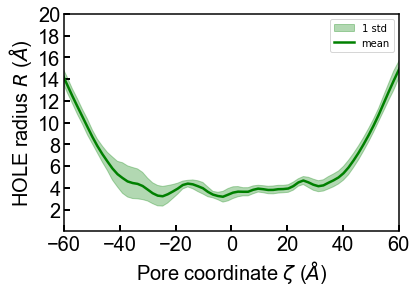

In [14]:
fig = plt.figure(1034, figsize=(16,12))
#fig, ax = plt.subplots()
#ax = fig.add_subplot(111)
ax = plt.figure(1034, figsize=(16,12))
from pylab import *
rc('axes', linewidth=1.5) 
#ax1.set_xlabel('HOLE radius $R$ ($\AA$)', fontsize=40, fontname='arial')
#ax1.set_ylabel('Pore coordinate $\zeta$ ($\AA$)', fontsize=40, fontname='arial')
ha.plot_mean_profile(bins=100, range=(-60.0,60.0), n_std=1, color='green', fill_alpha=0.3,legend=True, ax=True, legend_loc='best', linewidth=2.5)
plt.axis([-60.0, 60.0, 0, 20.01])
plt.ylabel('HOLE radius $R$ ($\AA$)', fontsize=20, fontname='arial')
plt.xlabel('Pore coordinate $\zeta$ ($\AA$)', fontsize=20, fontname='arial')
plt.yticks(np.arange(2, 20.01, 2), fontname='arial')
plt.xticks(np.arange(-60.0, 60.01, 20), fontname='arial')
#ax.set_xlim([-40, 40])
#ax.xaxis.set_minor_locator(plt.MultipleLocator(10))# set specify ticks label size
#ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
plt.tick_params(axis ='both', which= 'major', labelsize=20, direction='in', length=6, top=0, bottom=1, right=0, left=1, width=2)
#ax1.tick_params(axis ='both', which= 'major', left = 'bool', labelsize=20)
plt.tick_params(axis ='both', which= 'minor', labelsize=20, direction='in', length=2, bottom = 'bool')
#ax1.tick_params(axis='both', which= 'major', bottom = 'bool', labelsize=20 )
#ax1.tick_params(axis='both', which= 'minor', bottom = 'bool', labelsize=20, direction='in', length=8)
#plt.legend(fontsize=45, bbox_to_anchor=(0.05, 0.40, 0.75, 0.58), edgecolor='white')
#ax.ylim([0, 23])
#plt.yticks(np.arange(0, 23, 2.5), fontname='arial')
plt.savefig('new_06_05_p400mv.jpg', bbox_inches='tight', dpi=500)

In [15]:
ha.create_vmd_surface(filename='hole_06_p400mv.vmd', dot_density=15, double_water_color='green')

'hole_06_p400mv.vmd'

In [17]:
ha.delete_temporary_files()
ha.tmp_files

[]

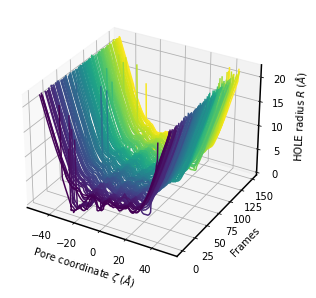

In [16]:
ha.plot3D()
plt.savefig('hole1_06.3D.p400mV.jpg', bbox_inches='tight', dpi=500)